In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from mplsoccer import Radar, FontManager, grid
#https://mplsoccer.readthedocs.io/en/latest/gallery/radar/plot_radar.html

URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [2]:
df = pd.read_csv("Wowen Super League 2023-24.csv")

In [3]:
df.head()

,Unnamed: 0,goals,yellowCards,redCards,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,successfulDribbles,assists,...,blockedShots,goalConversionPercentage,hitWoodwork,offsides,expectedGoals,errorLeadToGoal,errorLeadToShot,passToAssist,player,team
0,0,6,0,0,32,49.23,16,51.61,16,2,...,7,18.75,2,2,0.0,0,0,0,Khadija Shaw,Manchester City W.F.C.
1,1,6,2,0,26,55.32,4,57.14,13,1,...,6,20.69,2,1,0.0,0,0,0,Lauren James,Chelsea FC Women
2,2,1,0,0,6,75.00,1,25.00,3,0,...,0,33.33,0,1,NaN,0,0,0,Guro Reiten,Chelsea FC Women
3,3,0,0,0,22,73.33,5,50.00,5,1,...,0,0.00,0,0,0.0,0,1,0,Ève Périsset,Chelsea FC Women
4,4,1,3,0,37,67.27,15,60.00,8,2,...,2,10.00,1,0,0.0,0,0,0,Katie Zelem,Manchester United Women


In [4]:
df.columns

Index(['Unnamed: 0', 'goals', 'yellowCards', 'redCards', 'groundDuelsWon',
       'groundDuelsWonPercentage', 'aerialDuelsWon',
       'aerialDuelsWonPercentage', 'successfulDribbles', 'assists',
       'accuratePassesPercentage', 'totalDuelsWon', 'totalDuelsWonPercentage',
       'minutesPlayed', 'wasFouled', 'fouls', 'dispossessed', 'appearances',
       'saves', 'savedShotsFromInsideTheBox', 'savedShotsFromOutsideTheBox',
       'goalsConcededInsideTheBox', 'goalsConcededOutsideTheBox', 'highClaims',
       'successfulRunsOut', 'punches', 'runsOut', 'accurateFinalThirdPasses',
       'bigChancesCreated', 'accuratePasses', 'keyPasses', 'accurateCrosses',
       'accurateCrossesPercentage', 'accurateLongBalls',
       'accurateLongBallsPercentage', 'interceptions', 'clearances',
       'dribbledPast', 'bigChancesMissed', 'totalShots', 'shotsOnTarget',
       'blockedShots', 'goalConversionPercentage', 'hitWoodwork', 'offsides',
       'expectedGoals', 'errorLeadToGoal', 'errorLeadToSh

In [6]:
parametros_radar = ['player','team','minutesPlayed', 'totalDuelsWon', 'totalDuelsWonPercentage', 'successfulDribbles', 'accuratePasses', 'keyPasses', 'interceptions', 'clearances',
       'dribbledPast', 'wasFouled', 'fouls']

In [7]:
parametros_radar

['player',
 'team',
 'minutesPlayed',
 'totalDuelsWon',
 'totalDuelsWonPercentage',
 'successfulDribbles',
 'accuratePasses',
 'keyPasses',
 'interceptions',
 'clearances',
 'dribbledPast',
 'wasFouled',
 'fouls']

In [9]:
params = parametros_radar[3:]

In [11]:
df_filt = df[parametros_radar]
df_filt.shape

(246, 13)

In [12]:
df_filt.minutesPlayed.describe()

count    246.000000
mean     387.906504
std      239.769761
min        3.000000
25%      161.500000
50%      399.500000
75%      630.000000
max      720.000000
Name: minutesPlayed, dtype: float64

In [29]:
low = list(df_filt[df_filt['minutesPlayed'] > df_filt['minutesPlayed'].quantile(.3)].iloc[:,3:].describe().loc['min'].values)
high = list(df_filt[df_filt['minutesPlayed'] > df_filt['minutesPlayed'].quantile(.3)].iloc[:,3:].describe().loc['max'].values)

In [43]:
params, low, high, values_jugadora_1

(['totalDuelsWon',
  'totalDuelsWonPercentage',
  'successfulDribbles',
  'accuratePasses',
  'keyPasses',
  'interceptions',
  'clearances',
  'dribbledPast',
  'wasFouled',
  'fouls'],
 [0.0, 0.0, 0.0, 31.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [66.0, 100.0, 24.0, 558.0, 26.0, 19.0, 50.0, 15.0, 17.0, 15.0],
 [30.0, 55.56, 13.0, 190.0, 9.0, 1.0, 1.0, 1.0, 5.0, 7.0])

In [49]:
jugadora1 = 'Lauren James'
jugadora2 = 'Katie Zelem'

values_jugadora_1 = list(df_filt[df_filt['player'] == jugadora1].iloc[:,3:].reset_index(drop=True).iloc[0].values)
values_jugadora_2 = list(df_filt[df_filt['player'] == jugadora2].iloc[:,3:].reset_index(drop=True).iloc[0].values)
values_jugadora_2

[52.0, 65.0, 8.0, 413.0, 26.0, 10.0, 7.0, 9.0, 4.0, 4.0]

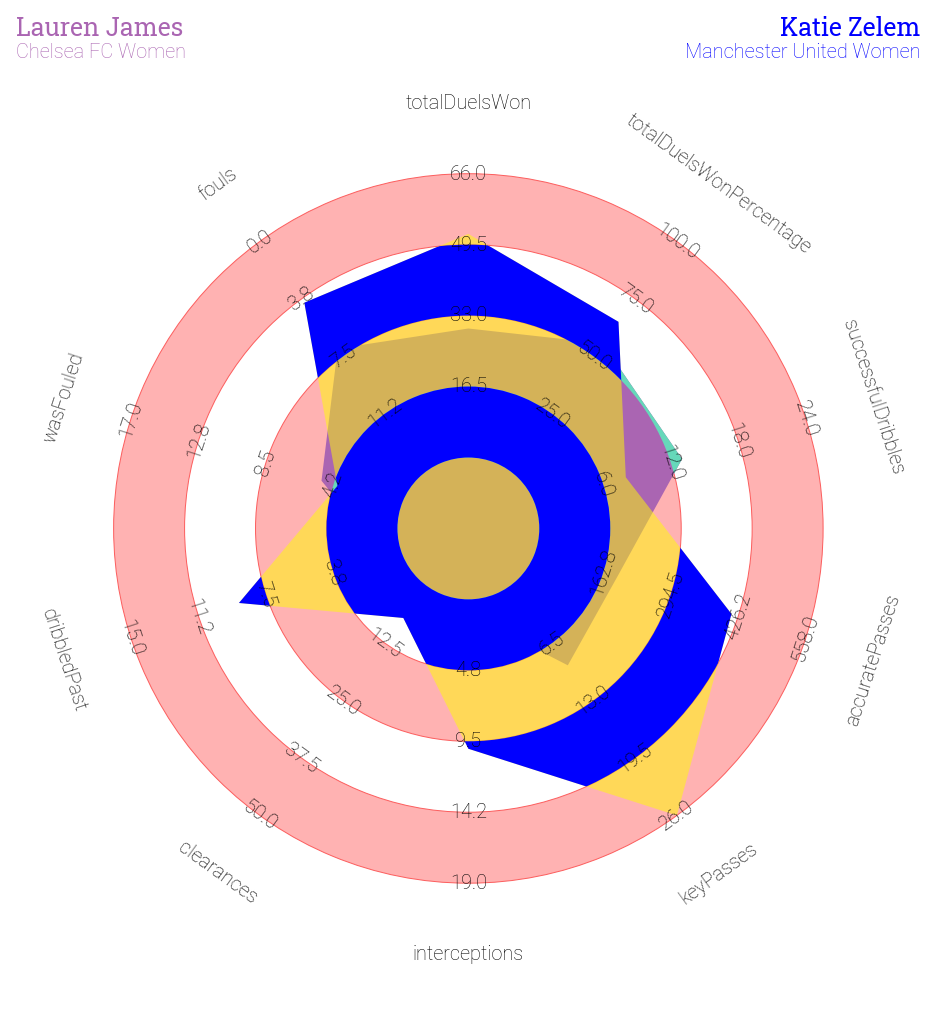

: 

In [51]:
lower_is_better = ['fouls']

radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

fig.set_facecolor('white')
radar.setup_axis(ax=axs['radar'])

rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles

radar_output = radar.draw_radar(values_jugadora_1, ax=axs['radar'],
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar

radar_output_2 = radar.draw_radar(values_jugadora_2, ax=axs['radar'],
                                kwargs_radar={'facecolor': 'yellow', 'alpha': .5},
                                kwargs_rings={'facecolor': 'blue'})  # draw the radar

#radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=20,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=20,
                                       fontproperties=robotto_thin.prop)  # draw the param labels

equipo = df_filt[df_filt['player'] == jugadora1].team.iloc[0]
equipo2 = df_filt[df_filt['player'] == jugadora2].team.iloc[0]


title1_text = axs['title'].text(0.01, 0.65, f'{jugadora1}', fontsize=25,
                                fontproperties=robotto_bold.prop, ha='left', va='center', color='#aa65b2')
title2_text = axs['title'].text(0.01, 0.25, f'{equipo}', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#aa65b2')

title1_text = axs['title'].text(0.99, 0.65, f'{jugadora2}', fontsize=25,
                                fontproperties=robotto_bold.prop, ha='right', va='center', color='blue')
title2_text = axs['title'].text(0.99, 0.25, f'{equipo2}', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='blue')

#plt.savefig('imagen.png', bbox_inches='tight', dpi=300)